# How does data science knowledge can help you on FIFA?

This project isn't about to be a great project or deep study. Here you can know the librie pandas

### Importing libries
We will use Pandas and Numpy to manipulate data and matplotlib and seaborn to visualize.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Checking our data


In [13]:
dataset = pd.read_csv('dataset/players_20.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [103]:
cols_players = ['long_name', 'age', 'height_cm', 'weight_kg', 
                'nationality', 'club', 'overall', 'wage_eur', 'value_eur', 
                'team_position', 'player_positions', 'pace', 
                'shooting', 'passing', 'dribbling', 'defending', 'physic']
cols_gk = ['long_name', 'age', 'height_cm', 'weight_kg', 
            'nationality', 'club', 'overall', 'wage_eur', 'value_eur', 
            'team_position', 'gk_diving', 'gk_handling', 
            'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning']

players = dataset[cols_players].copy()
players = players[players['team_position'] != 'GK']

goalkeepers = dataset[cols_gk].copy()
goalkeepers = goalkeepers[goalkeepers['team_position'] == 'GK']

In [110]:
len(players), len(goalkeepers)

(17616, 662)

In [111]:
players[['long_name', 'wage_eur', 'value_eur']].sort_values(by='value_eur', ascending=False).head(10)

,long_name,wage_eur,value_eur
2,Neymar da Silva Santos Junior,290000,105500000
0,Lionel Andrés Messi Cuccittini,565000,95500000
10,Kylian Mbappé,155000,93500000
4,Eden Hazard,470000,90000000
5,Kevin De Bruyne,370000,90000000
12,Harry Kane,220000,83000000
9,Mohamed Salah Ghaly,240000,80500000
7,Virgil van Dijk,200000,78000000
23,Paulo Bruno Exequiel Dybala,215000,76500000
26,Raheem Sterling,255000,73000000


In [112]:
euro_price = 4.7
players['wage_brl'] = players['wage_eur'].apply(lambda salary : (salary * euro_price)/1000)
players['value_brl'] = players['value_eur'].apply(lambda salary : (salary * euro_price)/1000000)

In [113]:
players[['long_name', 'value_brl', 'wage_brl']].sort_values(by='value_brl', ascending=False).head(10)

,long_name,value_brl,wage_brl
2,Neymar da Silva Santos Junior,495.85,1363.0
0,Lionel Andrés Messi Cuccittini,448.85,2655.5
10,Kylian Mbappé,439.45,728.5
4,Eden Hazard,423.00,2209.0
5,Kevin De Bruyne,423.00,1739.0
12,Harry Kane,390.10,1034.0
9,Mohamed Salah Ghaly,378.35,1128.0
7,Virgil van Dijk,366.60,940.0
23,Paulo Bruno Exequiel Dybala,359.55,1010.5
26,Raheem Sterling,343.10,1198.5


In [114]:
top_100 = players[['long_name', 'value_brl', 'wage_brl', 'overall', 'team_position', 'nationality', 'age']].sort_values(by='overall', ascending=False).head(100)
top_100.head()

,long_name,value_brl,wage_brl,overall,team_position,nationality,age
0,Lionel Andrés Messi Cuccittini,448.85,2655.5,94,RW,Argentina,32
1,Cristiano Ronaldo dos Santos Aveiro,274.95,1903.5,93,LW,Portugal,34
2,Neymar da Silva Santos Junior,495.85,1363.0,92,CAM,Brazil,27
4,Eden Hazard,423.00,2209.0,91,LW,Belgium,28
5,Kevin De Bruyne,423.00,1739.0,91,RCM,Belgium,28


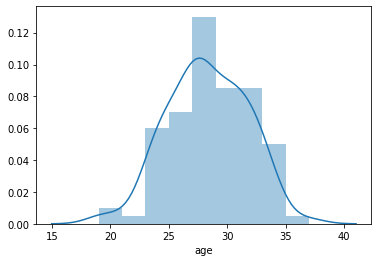

In [115]:
sns.distplot(top_100['age'])

In [116]:
top_100['age'].describe()

count    100.000000
mean      28.290000
std        3.388319
min       19.000000
25%       26.000000
50%       28.000000
75%       31.000000
max       37.000000
Name: age, dtype: float64

In [117]:
top_100['team_position'].value_counts()

SUB    16
LCB    10
ST     10
RCB     9
RCM     8
CDM     6
LW      6
LCM     6
LB      5
RW      5
CAM     3
LM      2
LS      2
CF      2
RM      2
RB      2
LDM     2
RAM     1
RES     1
RDM     1
RS      1
Name: team_position, dtype: int64

In [131]:
players['e'] = 1

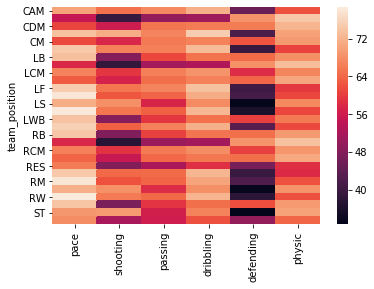

In [138]:
skills = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
table = players.groupby(by='team_position')[skills].mean()
sns.heatmap(table)